<a href="https://www.kaggle.com/code/heshamibrahem/notebookf957e19c53?scriptVersionId=115851980" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/construction.csv
/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/bottoms.csv
/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/accessories.csv
/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/insects.csv
/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/floors.csv
/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/shoes.csv
/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/wall-mounted.csv
/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/achievements.csv
/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/umbrellas.csv
/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/rugs.csv
/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/housewares.csv
/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/art.csv
/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/reactions.csv
/kaggle/input/animal-crossing-new-h

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns #If needed

# **construction**

In [3]:
df = pd.read_csv("/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/construction.csv")
df.head()

,Name,Buy,Category,Source,Filename,Version,Unique Entry ID
0,brick bridge,198000,Bridge,Resident Services Upgrade,BridgeBricks,1.0.0,Rvkrg9tcubTMakcBS
1,iron bridge,228000,Bridge,Resident Services Upgrade,BridgeIron,1.0.0,RmQ6iiKkFf3Sy4iSQ
2,log bridge,98000,Bridge,Resident Services Upgrade,BridgeLog,1.0.0,Px55sTfjKSbbMtjAK
3,red zen bridge,228000,Bridge,Resident Services Upgrade,BridgeRed,1.0.0,jTziEHXkeYaugKDQQ
4,stone bridge,168000,Bridge,Resident Services Upgrade,BridgeStone,1.0.0,JmrwC2tRRCCgbZnrp


In [4]:
def infoo(df):
    df.info() # getting data frame information
    print("-" * 50)
    print(f"number of rows: {df.shape[0]}") # dataframe rows number
    print("-" * 50)
    print(f"number of columns: {df.shape[1]}") # dataframe columns number
    print("-" * 50)
    for c in df.columns:
        if df[c].dtype == 'float' or df[c].dtype == 'int': # if numerical values
            print("the values of {} are within range {} to {}".format(c,df[c].min(),df[c].max())) # get range
            print("-" * 50)
        else: # string or categorial values
            print("Number of Unique value of {} is: {}".format(c, len(df[c].unique()))) # get number of unqiue value
            print("Unique value of {} is: {}".format(c, df[c].unique())) # get unique values
            print("-" * 50)
    for c in df.columns:
        print("Nan number in {} is: {}".format(c, df[c].isna().sum())) # collect nan values
        print("-" * 50)

In [5]:
infoo(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             236 non-null    object
 1   Buy              236 non-null    int64 
 2   Category         236 non-null    object
 3   Source           236 non-null    object
 4   Filename         236 non-null    object
 5   Version          236 non-null    object
 6   Unique Entry ID  236 non-null    object
dtypes: int64(1), object(6)
memory usage: 13.0+ KB
--------------------------------------------------
number of rows: 236
--------------------------------------------------
number of columns: 7
--------------------------------------------------
Number of Unique value of Name is: 236
Unique value of Name is: ['brick bridge' 'iron bridge' 'log bridge' 'red zen bridge' 'stone bridge'
 'suspension bridge' 'wooden bridge' 'zen bridge' 'basic door'
 'beige basic door' 'beige simple door' 'bei

In [6]:
#Delete unnecessary columns
df.drop(['Filename','Version','Unique Entry ID'],axis=1,inplace=True)
df.head()

,Name,Buy,Category,Source
0,brick bridge,198000,Bridge,Resident Services Upgrade
1,iron bridge,228000,Bridge,Resident Services Upgrade
2,log bridge,98000,Bridge,Resident Services Upgrade
3,red zen bridge,228000,Bridge,Resident Services Upgrade
4,stone bridge,168000,Bridge,Resident Services Upgrade


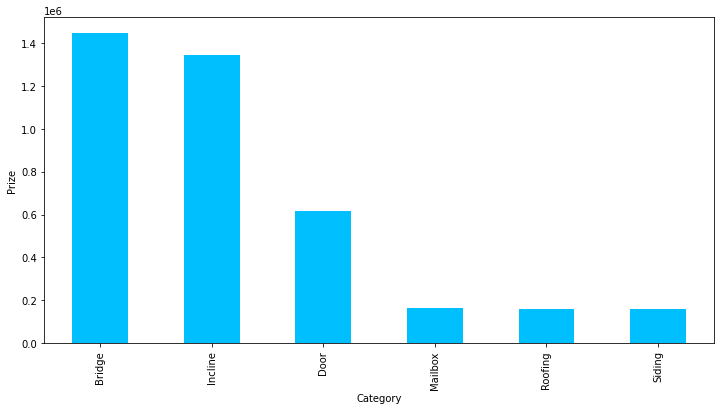

In [7]:
# Start with the total prize of each category
Plotting = df.groupby('Category')['Buy'].agg('sum').sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Category')
plt.ylabel('Prize')
plt.show()

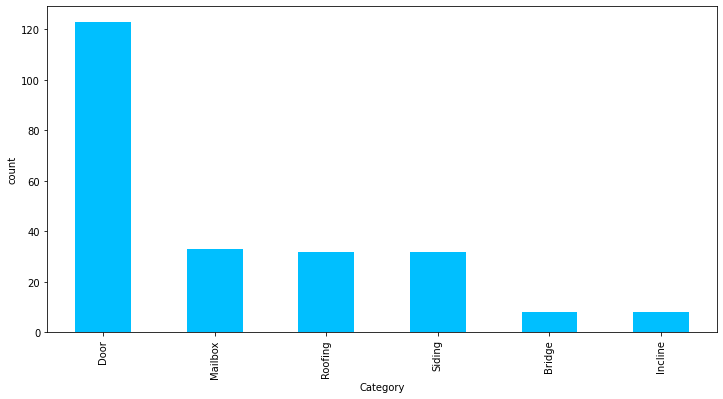

In [8]:
# The number of each category
Plotting = df["Category"].value_counts().sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Category')
plt.ylabel('count')
plt.show()

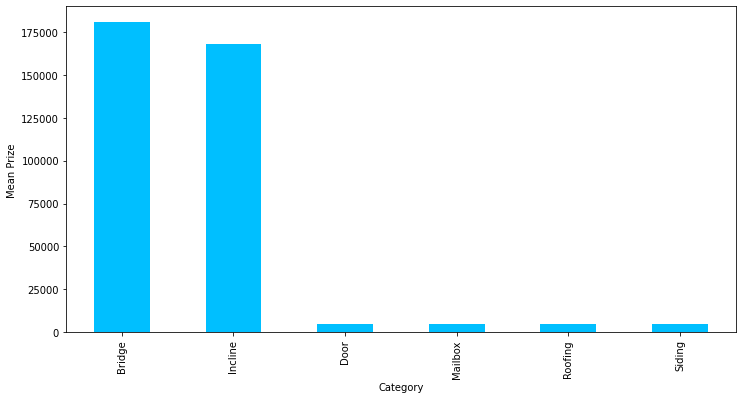

In [9]:
# The mean prize will show the prize for each category
Plotting = df.groupby('Category')['Buy'].agg('mean').sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Category')
plt.ylabel('Mean Prize')
plt.show()

In [10]:
c_count = df["Category"].value_counts()
c_prize = df.groupby('Category')['Buy'].agg('mean')
c_final = pd.concat([c_count, c_prize], axis=1)
c_final

,Category,Buy
Door,123,5000.0
Mailbox,33,5000.0
Roofing,32,5000.0
Siding,32,5000.0
Bridge,8,180725.0
Incline,8,168000.0


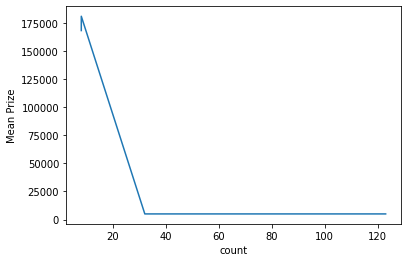

In [11]:
plotting = plt.plot(c_final['Category'],c_final['Buy'])
plt.ylabel("Mean Prize")
plt.xlabel("count")
plt.show()

**They prefer the cheapest category**

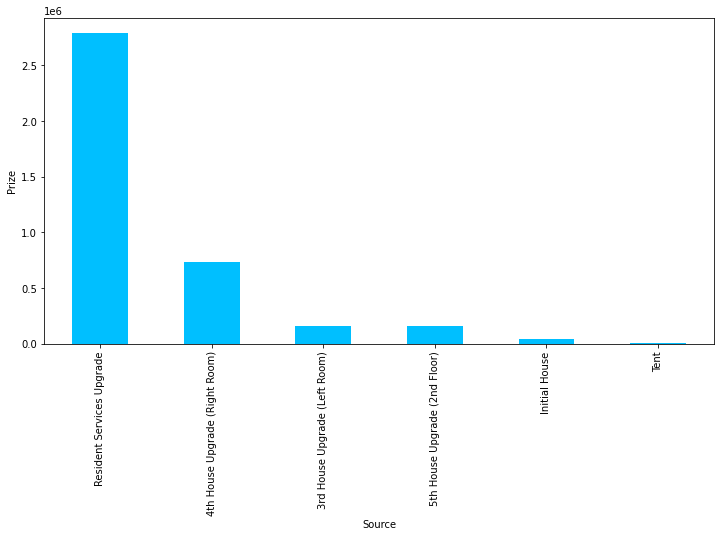

In [12]:
# Same thing with source
Plotting = df.groupby('Source')['Buy'].agg('sum').sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Source')
plt.ylabel('Prize')
plt.show()

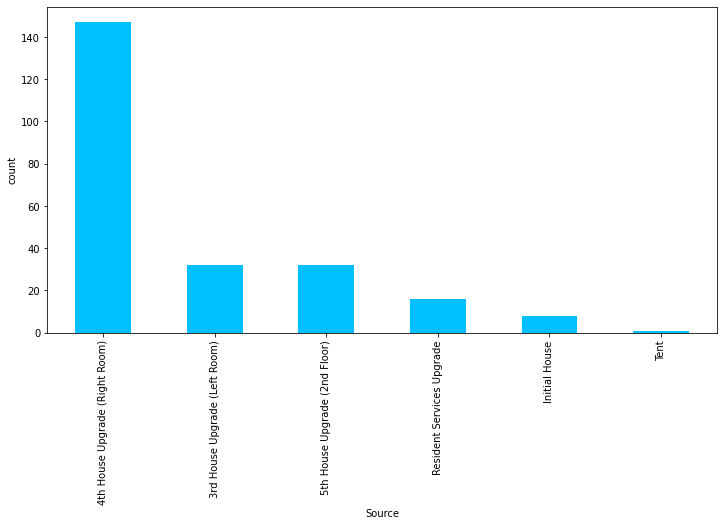

In [13]:
# The number of each category
Plotting = df["Source"].value_counts().sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Source')
plt.ylabel('count')
plt.show()

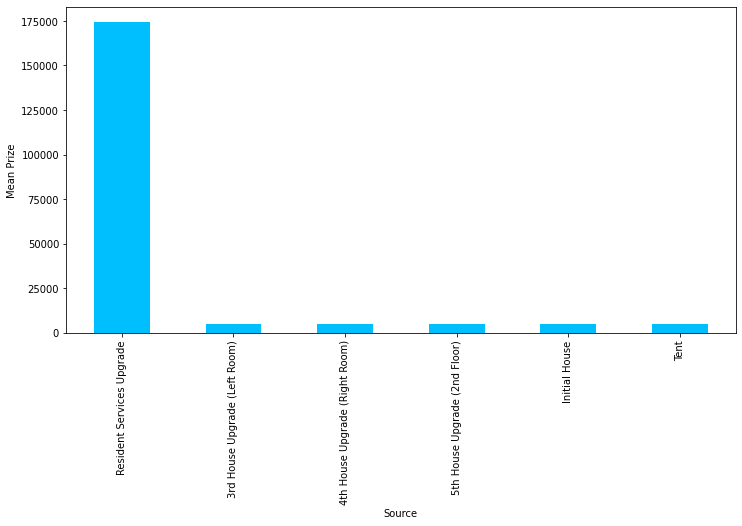

In [14]:
# The mean prize will show the prize for each category
Plotting = df.groupby('Source')['Buy'].agg('mean').sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Source')
plt.ylabel('Mean Prize')
plt.show()

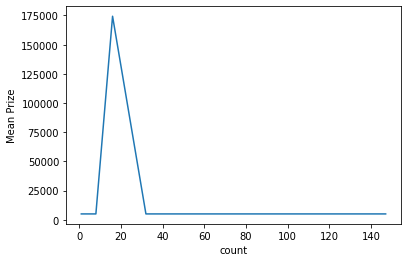

In [15]:
s_count = df["Source"].value_counts()
s_prize = df.groupby('Source')['Buy'].agg('mean')
s_final = pd.concat([s_count, s_prize], axis=1)
plotting = plt.plot(s_final['Source'],s_final['Buy'])
plt.ylabel("Mean Prize")
plt.xlabel("count")
plt.show()

In [16]:
s_final[(s_final.Source < 30) & (s_final.Source>10)]

,Source,Buy
Resident Services Upgrade,16,174362.5


**Resident Services Upgrade is the highest prize but it's in the middle**

In [17]:
rsu = df[df.Source == 'Resident Services Upgrade']
non_rsu = df[df.Source != 'Resident Services Upgrade']

In [18]:
print("This is RSU categories")
for i in list(rsu.Category.unique()):
    print(i)
print("*"*50)
print("And other categories")
for i in list(non_rsu.Category.unique()):
    print(i)

This is RSU categories
Bridge
Incline
**************************************************
And other categories
Door
Mailbox
Roofing
Siding


In [19]:
rsu_cata = df[(df.Category == 'Bridge') | (df.Category == 'Incline')]
rsu_cata.head()

,Name,Buy,Category,Source
0,brick bridge,198000,Bridge,Resident Services Upgrade
1,iron bridge,228000,Bridge,Resident Services Upgrade
2,log bridge,98000,Bridge,Resident Services Upgrade
3,red zen bridge,228000,Bridge,Resident Services Upgrade
4,stone bridge,168000,Bridge,Resident Services Upgrade


In [20]:
rsu_cata.groupby('Category').agg('mean')

,Buy
Category,
Bridge,180725.0
Incline,168000.0


Despite its high price, it is one of the most important Source because it has two important categories (Bridge and Incline), the other sources don't have these categories

# **Bottoms**

In [21]:
df = pd.read_csv("/kaggle/input/animal-crossing-new-horizons-nookplaza-dataset/bottoms.csv")
df.head()

,Name,Variation,DIY,Buy,Sell,Color 1,Color 2,Size,Source,Source Notes,Seasonal Availability,Mannequin Piece,Version,Style,Label Themes,Villager Equippable,Catalog,Filename,Internal ID,Unique Entry ID
0,acid-washed jeans,Blue,No,1320,330,Blue,Blue,1x1,Able Sisters,Available from either Mable's temporary shop o...,All Year,Yes,1.0.0,Simple,everyday; outdoorsy,No,For sale,BottomsTexPantsNormalChemical0,5286,QaecPktemD3XuFdwy
1,acid-washed jeans,Black,No,1320,330,Black,Black,1x1,Able Sisters,Available from either Mable's temporary shop o...,All Year,No,1.0.0,Simple,everyday; outdoorsy,No,For sale,BottomsTexPantsNormalChemical1,11385,a7HNjgRFkCznkDLLH
2,animal-stripes skirt,Tiger,No,1100,275,Yellow,Black,1x1,Able Sisters,Available from either Mable's temporary shop o...,All Year,No,1.0.0,Cool,everyday,No,For sale,BottomsTexSkirtBoxStripe0,9842,qmtHwBmtJDvtNntTs
3,animal-stripes skirt,Zebra,No,1100,275,Gray,Black,1x1,Able Sisters,Available from either Mable's temporary shop o...,All Year,No,1.0.0,Cool,everyday,No,For sale,BottomsTexSkirtBoxStripe1,12067,4mDRmSG3scfXh3oon
4,apron skirt,Purple,No,700,175,White,Purple,1x1,Able Sisters,Available from Able Sisters shop only,All Year,No,1.0.0,Simple,work,No,For sale,BottomsTexSkirtBoxApron0,5710,MtsvEMQ9Z9damsycd


In [22]:
infoo(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   726 non-null    object
 1   Variation              726 non-null    object
 2   DIY                    726 non-null    object
 3   Buy                    726 non-null    object
 4   Sell                   726 non-null    int64 
 5   Color 1                726 non-null    object
 6   Color 2                726 non-null    object
 7   Size                   726 non-null    object
 8   Source                 726 non-null    object
 9   Source Notes           709 non-null    object
 10  Seasonal Availability  726 non-null    object
 11  Mannequin Piece        726 non-null    object
 12  Version                726 non-null    object
 13  Style                  726 non-null    object
 14  Label Themes           726 non-null    object
 15  Villager Equippable    

In [23]:
#fix buy problem
for i in df.index:
    try:
        float(df.Buy.loc[i]) # this will test if it's number or no
    except:
        df.Buy.loc[i] = "0"
df.Buy = df.Buy.astype("int")
df.Buy.dtype

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


dtype('int64')

In [24]:
df[(df.Sell > df.Buy) & (df.Buy != 0)]

,Name,Variation,DIY,Buy,Sell,Color 1,Color 2,Size,Source,Source Notes,Seasonal Availability,Mannequin Piece,Version,Style,Label Themes,Villager Equippable,Catalog,Filename,Internal ID,Unique Entry ID


In [25]:
df['profit'] = df.Buy - df.Sell
df.head()

,Name,Variation,DIY,Buy,Sell,Color 1,Color 2,Size,Source,Source Notes,...,Mannequin Piece,Version,Style,Label Themes,Villager Equippable,Catalog,Filename,Internal ID,Unique Entry ID,profit
0,acid-washed jeans,Blue,No,1320,330,Blue,Blue,1x1,Able Sisters,Available from either Mable's temporary shop o...,...,Yes,1.0.0,Simple,everyday; outdoorsy,No,For sale,BottomsTexPantsNormalChemical0,5286,QaecPktemD3XuFdwy,990
1,acid-washed jeans,Black,No,1320,330,Black,Black,1x1,Able Sisters,Available from either Mable's temporary shop o...,...,No,1.0.0,Simple,everyday; outdoorsy,No,For sale,BottomsTexPantsNormalChemical1,11385,a7HNjgRFkCznkDLLH,990
2,animal-stripes skirt,Tiger,No,1100,275,Yellow,Black,1x1,Able Sisters,Available from either Mable's temporary shop o...,...,No,1.0.0,Cool,everyday,No,For sale,BottomsTexSkirtBoxStripe0,9842,qmtHwBmtJDvtNntTs,825
3,animal-stripes skirt,Zebra,No,1100,275,Gray,Black,1x1,Able Sisters,Available from either Mable's temporary shop o...,...,No,1.0.0,Cool,everyday,No,For sale,BottomsTexSkirtBoxStripe1,12067,4mDRmSG3scfXh3oon,825
4,apron skirt,Purple,No,700,175,White,Purple,1x1,Able Sisters,Available from Able Sisters shop only,...,No,1.0.0,Simple,work,No,For sale,BottomsTexSkirtBoxApron0,5710,MtsvEMQ9Z9damsycd,525


In [26]:
#remove unnecessary thing
df.drop(['Unique Entry ID','Internal ID','Filename','Villager Equippable','Version','Size'],axis=1,inplace=True)

In [27]:
infoo(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   726 non-null    object
 1   Variation              726 non-null    object
 2   DIY                    726 non-null    object
 3   Buy                    726 non-null    int64 
 4   Sell                   726 non-null    int64 
 5   Color 1                726 non-null    object
 6   Color 2                726 non-null    object
 7   Source                 726 non-null    object
 8   Source Notes           709 non-null    object
 9   Seasonal Availability  726 non-null    object
 10  Mannequin Piece        726 non-null    object
 11  Style                  726 non-null    object
 12  Label Themes           726 non-null    object
 13  Catalog                726 non-null    object
 14  profit                 726 non-null    int64 
dtypes: int64(3), object(12)

In [28]:
df[df.Catalog == 'Not for sale']

,Name,Variation,DIY,Buy,Sell,Color 1,Color 2,Source,Source Notes,Seasonal Availability,Mannequin Piece,Style,Label Themes,Catalog,profit
349,grass skirt,Brown,Yes,0,140,Beige,Beige,Crafting,NaN,All Year,No,Active,outdoorsy; vacation,Not for sale,-140
350,green grass skirt,Green,Yes,0,140,Green,Green,Crafting,NaN,All Year,No,Active,outdoorsy; vacation,Not for sale,-140
660,torn pants,Brown,No,0,10,Brown,Brown,Recycle bin,NaN,All Year,No,Simple,goth,Not for sale,-10
661,torn pants,Black,No,0,10,Black,Black,Recycle bin,NaN,All Year,No,Simple,goth,Not for sale,-10
662,torn pants,Gray,No,0,10,Gray,Gray,Recycle bin,NaN,All Year,No,Simple,goth,Not for sale,-10


In [29]:
df.dropna(inplace = True)
df[df.Catalog == 'Not for sale']

,Name,Variation,DIY,Buy,Sell,Color 1,Color 2,Source,Source Notes,Seasonal Availability,Mannequin Piece,Style,Label Themes,Catalog,profit


In [30]:
infoo(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 0 to 725
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   709 non-null    object
 1   Variation              709 non-null    object
 2   DIY                    709 non-null    object
 3   Buy                    709 non-null    int64 
 4   Sell                   709 non-null    int64 
 5   Color 1                709 non-null    object
 6   Color 2                709 non-null    object
 7   Source                 709 non-null    object
 8   Source Notes           709 non-null    object
 9   Seasonal Availability  709 non-null    object
 10  Mannequin Piece        709 non-null    object
 11  Style                  709 non-null    object
 12  Label Themes           709 non-null    object
 13  Catalog                709 non-null    object
 14  profit                 709 non-null    int64 
dtypes: int64(3), object(12)

In [31]:
#Found another unnecessary coulmns
df.drop(['DIY','Source','Catalog'],axis=1,inplace=True)
df.head()

,Name,Variation,Buy,Sell,Color 1,Color 2,Source Notes,Seasonal Availability,Mannequin Piece,Style,Label Themes,profit
0,acid-washed jeans,Blue,1320,330,Blue,Blue,Available from either Mable's temporary shop o...,All Year,Yes,Simple,everyday; outdoorsy,990
1,acid-washed jeans,Black,1320,330,Black,Black,Available from either Mable's temporary shop o...,All Year,No,Simple,everyday; outdoorsy,990
2,animal-stripes skirt,Tiger,1100,275,Yellow,Black,Available from either Mable's temporary shop o...,All Year,No,Cool,everyday,825
3,animal-stripes skirt,Zebra,1100,275,Gray,Black,Available from either Mable's temporary shop o...,All Year,No,Cool,everyday,825
4,apron skirt,Purple,700,175,White,Purple,Available from Able Sisters shop only,All Year,No,Simple,work,525


In [32]:
# Because of Variation = Color1 + Color2
df.drop(['Color 1','Color 2'],axis=1,inplace=True)
df.head()

,Name,Variation,Buy,Sell,Source Notes,Seasonal Availability,Mannequin Piece,Style,Label Themes,profit
0,acid-washed jeans,Blue,1320,330,Available from either Mable's temporary shop o...,All Year,Yes,Simple,everyday; outdoorsy,990
1,acid-washed jeans,Black,1320,330,Available from either Mable's temporary shop o...,All Year,No,Simple,everyday; outdoorsy,990
2,animal-stripes skirt,Tiger,1100,275,Available from either Mable's temporary shop o...,All Year,No,Cool,everyday,825
3,animal-stripes skirt,Zebra,1100,275,Available from either Mable's temporary shop o...,All Year,No,Cool,everyday,825
4,apron skirt,Purple,700,175,Available from Able Sisters shop only,All Year,No,Simple,work,525


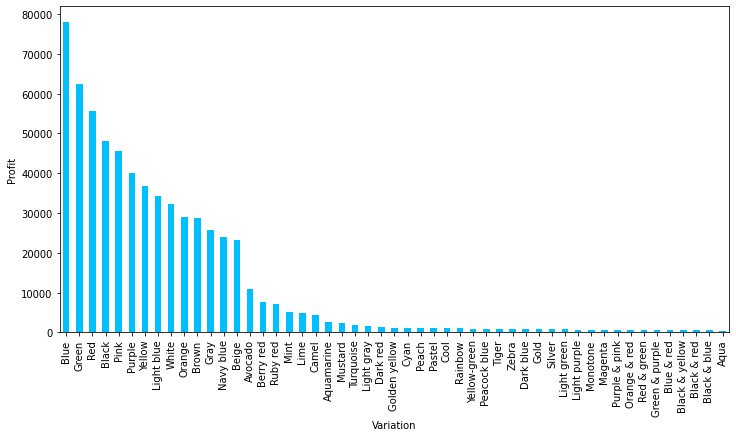

In [33]:
Plotting = df.groupby('Variation')['profit'].agg('sum').sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Variation')
plt.ylabel('Profit')
plt.show()

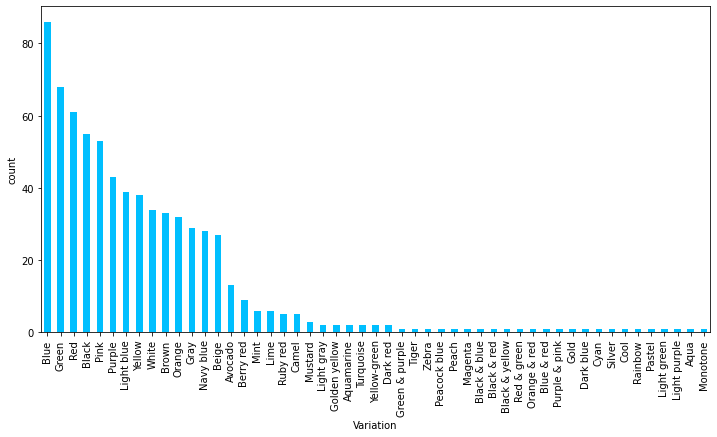

In [34]:
Plotting = df.Variation.value_counts().sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Variation')
plt.ylabel('count')
plt.show()

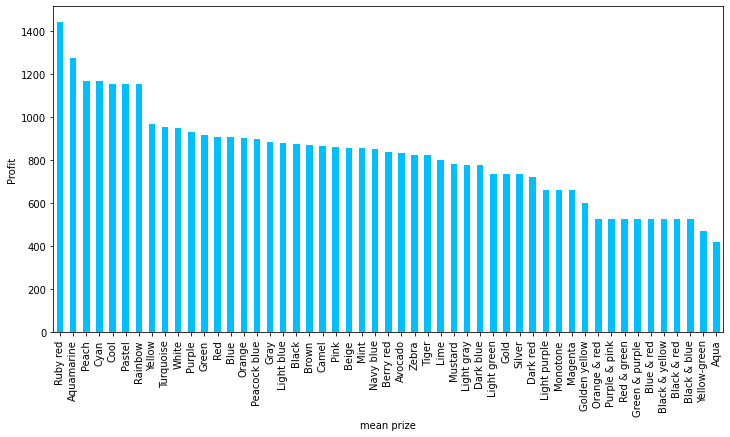

In [35]:
Plotting = df.groupby('Variation')['profit'].agg('mean').sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('mean prize')
plt.ylabel('Profit')
plt.show()

the best choice is unicolor which has only one color it's the highest choice for selling

In [36]:
df.head()

,Name,Variation,Buy,Sell,Source Notes,Seasonal Availability,Mannequin Piece,Style,Label Themes,profit
0,acid-washed jeans,Blue,1320,330,Available from either Mable's temporary shop o...,All Year,Yes,Simple,everyday; outdoorsy,990
1,acid-washed jeans,Black,1320,330,Available from either Mable's temporary shop o...,All Year,No,Simple,everyday; outdoorsy,990
2,animal-stripes skirt,Tiger,1100,275,Available from either Mable's temporary shop o...,All Year,No,Cool,everyday,825
3,animal-stripes skirt,Zebra,1100,275,Available from either Mable's temporary shop o...,All Year,No,Cool,everyday,825
4,apron skirt,Purple,700,175,Available from Able Sisters shop only,All Year,No,Simple,work,525


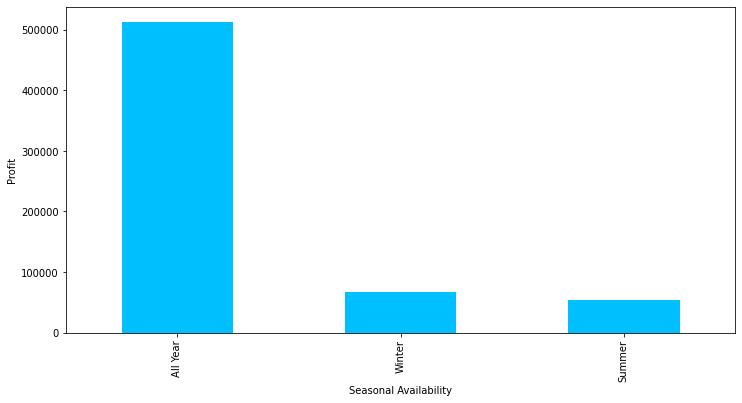

In [37]:
Plotting = df.groupby('Seasonal Availability')['profit'].agg('sum').sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Seasonal Availability')
plt.ylabel('Profit')
plt.show()

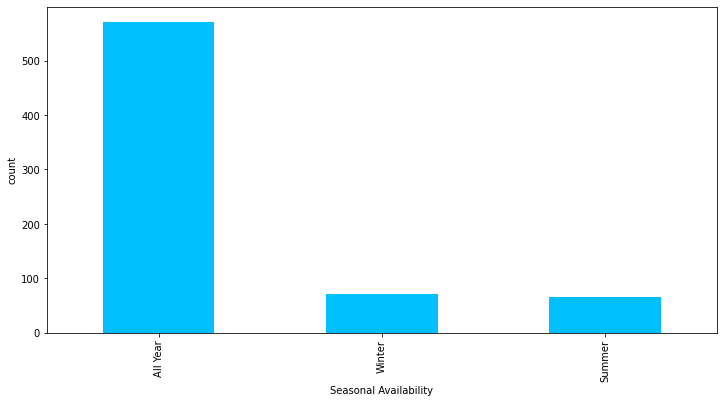

In [38]:
Plotting = df['Seasonal Availability'].value_counts().sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Seasonal Availability')
plt.ylabel('count')
plt.show()

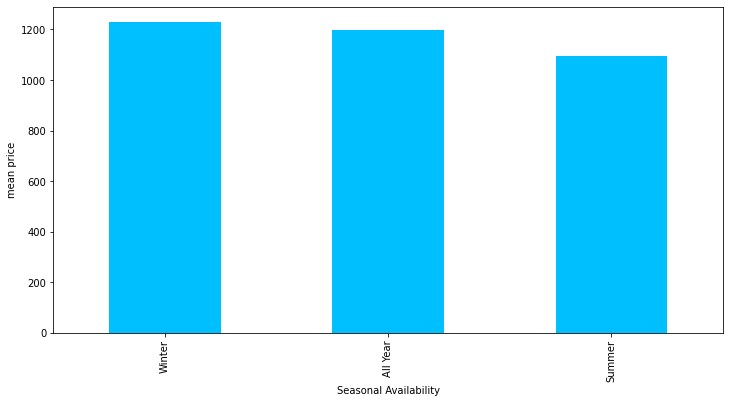

In [39]:
Plotting = df.groupby('Seasonal Availability')['Buy'].agg('mean').sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Seasonal Availability')
plt.ylabel('mean price')
plt.show()

they are in the same prize but people prefer to buy clothes that suit all year

In [40]:
df.head()

,Name,Variation,Buy,Sell,Source Notes,Seasonal Availability,Mannequin Piece,Style,Label Themes,profit
0,acid-washed jeans,Blue,1320,330,Available from either Mable's temporary shop o...,All Year,Yes,Simple,everyday; outdoorsy,990
1,acid-washed jeans,Black,1320,330,Available from either Mable's temporary shop o...,All Year,No,Simple,everyday; outdoorsy,990
2,animal-stripes skirt,Tiger,1100,275,Available from either Mable's temporary shop o...,All Year,No,Cool,everyday,825
3,animal-stripes skirt,Zebra,1100,275,Available from either Mable's temporary shop o...,All Year,No,Cool,everyday,825
4,apron skirt,Purple,700,175,Available from Able Sisters shop only,All Year,No,Simple,work,525


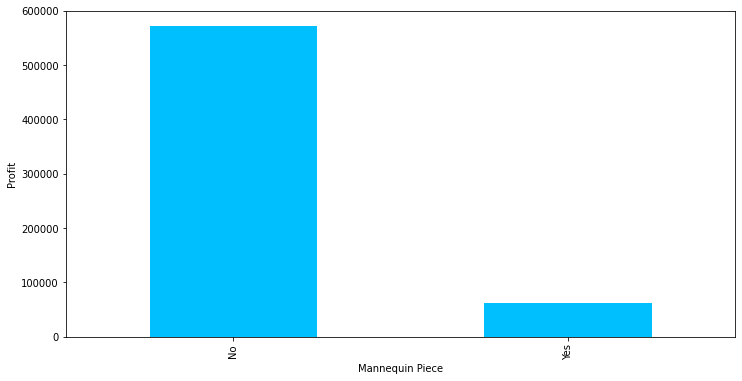

In [41]:
Plotting = df.groupby('Mannequin Piece')['profit'].agg('sum').sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Mannequin Piece')
plt.ylabel('Profit')
plt.show()

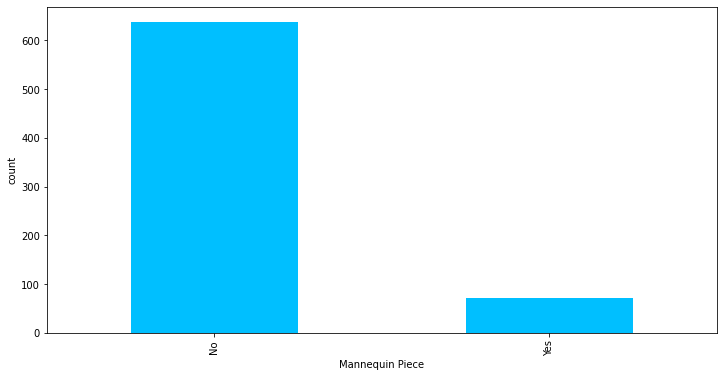

In [42]:
Plotting = df['Mannequin Piece'].value_counts().sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Mannequin Piece')
plt.ylabel('count')
plt.show()

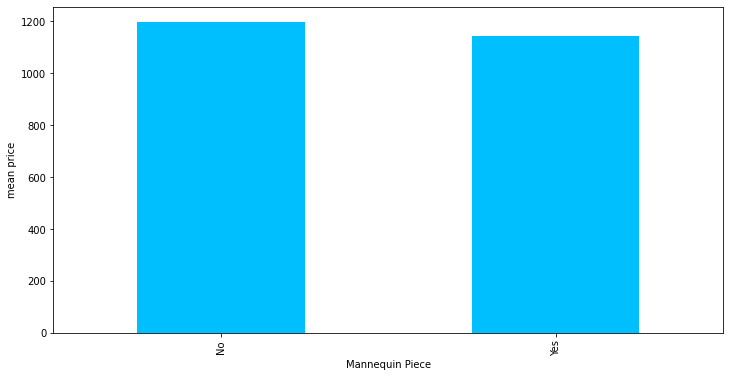

In [43]:
Plotting = df.groupby('Mannequin Piece')['Buy'].agg('mean').sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Mannequin Piece')
plt.ylabel('mean price')
plt.show()

People prefer to buy pieces that not on the mannequin

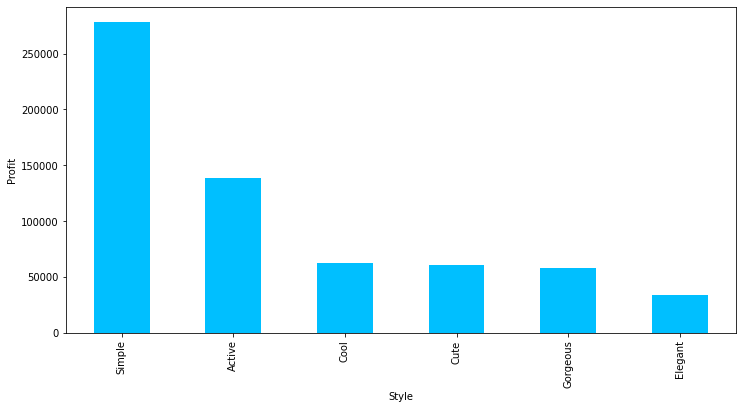

In [44]:
Plotting = df.groupby('Style')['profit'].agg('sum').sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Style')
plt.ylabel('Profit')
plt.show()

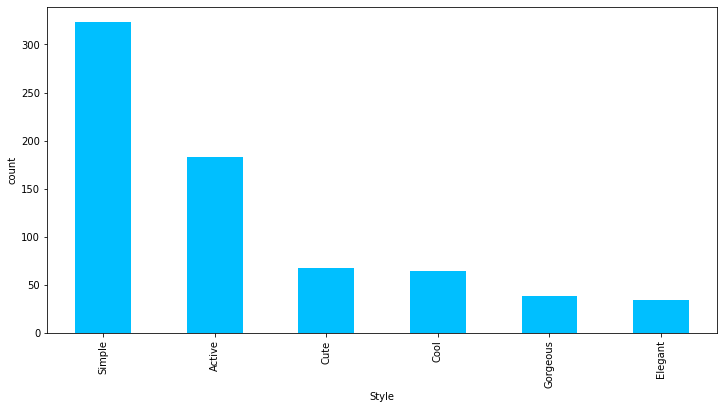

In [45]:
Plotting = df['Style'].value_counts().sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Style')
plt.ylabel('count')
plt.show()

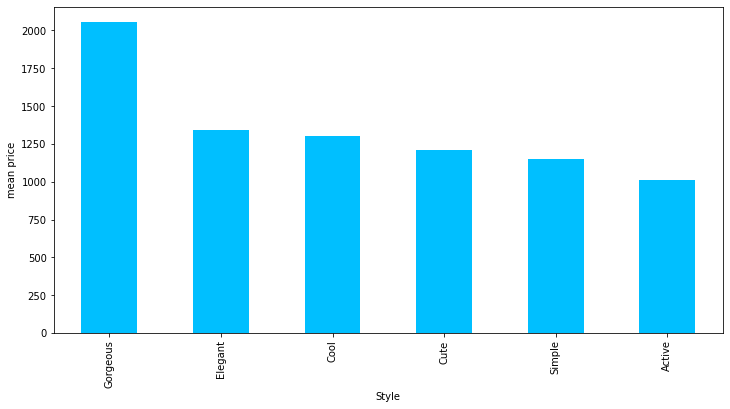

In [46]:
lotting = df.groupby('Style')['Buy'].agg('mean').sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Style')
plt.ylabel('mean price')
plt.show()

People prefer simple clothes maybe because its price

In [47]:
df.head()

,Name,Variation,Buy,Sell,Source Notes,Seasonal Availability,Mannequin Piece,Style,Label Themes,profit
0,acid-washed jeans,Blue,1320,330,Available from either Mable's temporary shop o...,All Year,Yes,Simple,everyday; outdoorsy,990
1,acid-washed jeans,Black,1320,330,Available from either Mable's temporary shop o...,All Year,No,Simple,everyday; outdoorsy,990
2,animal-stripes skirt,Tiger,1100,275,Available from either Mable's temporary shop o...,All Year,No,Cool,everyday,825
3,animal-stripes skirt,Zebra,1100,275,Available from either Mable's temporary shop o...,All Year,No,Cool,everyday,825
4,apron skirt,Purple,700,175,Available from Able Sisters shop only,All Year,No,Simple,work,525


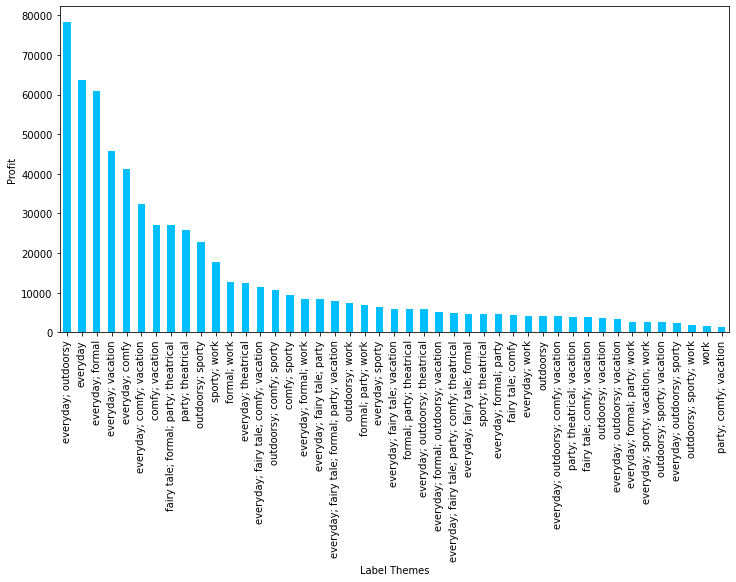

In [48]:
Plotting = df.groupby('Label Themes')['profit'].agg('sum').sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Label Themes')
plt.ylabel('Profit')
plt.show()

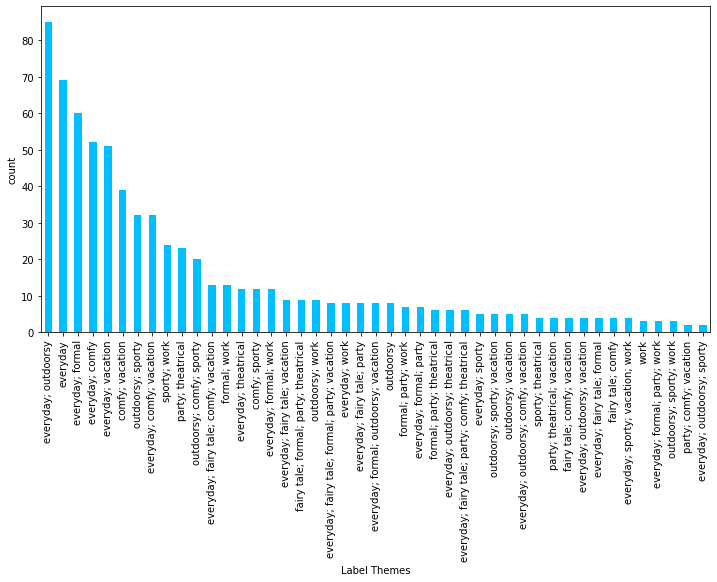

In [49]:
Plotting = df['Label Themes'].value_counts().sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Label Themes')
plt.ylabel('count')
plt.show()

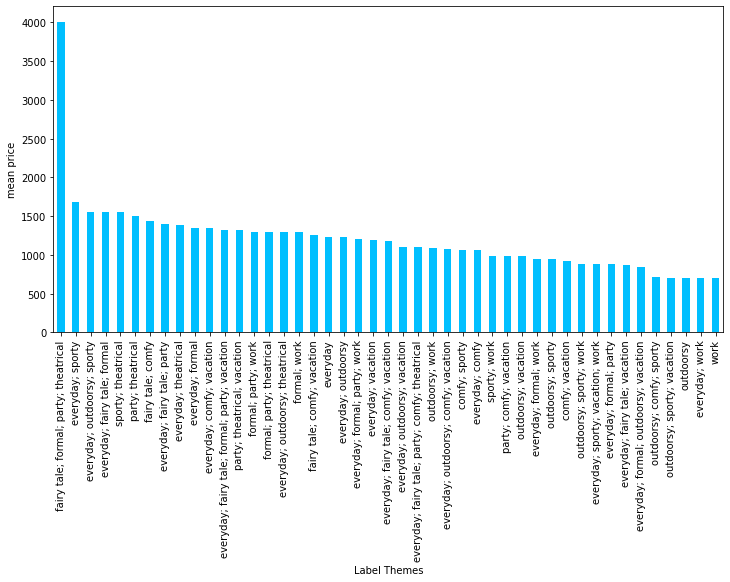

In [50]:
lotting = df.groupby('Label Themes')['Buy'].agg('mean').sort_values(ascending=False).plot(kind='bar', color="deepskyblue", figsize=(12,6))
plt.xlabel('Label Themes')
plt.ylabel('mean price')
plt.show()

People prefere everyday: outdoorsy